# 2 Aprendizaje supervisado

**Aprendizaje supervisado:** $\;$ forma de ML más común

**Tarea T:** $\;$ consiste en aprender una transformación $f:\mathcal{X}\to\mathcal{Y}$ donde
* **Entradas $\boldsymbol{x}\in\mathcal{X}$:** $\;$ suelen ser un vector de $D$ características reales $\mathcal{X}=\mathbb{R}^D$
* **Salidas $\boldsymbol{y}\in\mathcal{Y}$:** $\;$ suelen ser etiquetas de clase o reales

**Experiencia E:** $\;$ dada por un **conjunto de entrenamiento** $\,\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}_{n=1}^N$
* $N$ es el **tamaño de la muestra**
* También es usual referirnos a cada par $(\boldsymbol{x}_n,\boldsymbol{y}_n)$ como **muestra (de entrenamiento)**

**Medida de rendimiento P:** $\;$ depende del tipo de salida

## 2.1 Clasificación

**Problema de clasificación:** $\;$ el espacio de salida es un conjunto de $C$ **etiquetas de clases,** $\;\mathcal{Y}=\{1,2,\dotsc,C\}$

**Reconocimiento de formas (pattern recognition):** $\;$ predicción de la etiqueta de clase de una entrada dada

**Clasificación binaria:** $\;$ caso particular en el que solo tenemos dos clases, $\,y\in\{0,1\}\,$ o $\,y\in\{-1,+1\}$

### 2.1.1 Ejemplo: clasificación de flores iris

**Clasificación de flores iris de las especies setosa, versicolor y virgínica:** $\;$ ejemplo clásico en clasificación estadística

<center>

| Setosa                      | Versicolor                      | Virgínica                      |
| --------------------------- | ------------------------------- | ------------------------------ |
| <img src="Figure_1.1_A.png" width="150"/> | <img src="Figure_1.1_B.png" width="150"/> | <img src="Figure_1.1_C.png" width="150"/> |

</center>

**Espacio de entrada:** $\;\mathcal{X}$ es un conjunto de imágenes que, por lo general, es de dimensión muy elevada
* *Ejemplo:* $\;\mathcal{X}=\mathbb{R}^D$ con $D=C\times D_1\times D_2\,$ para una imagen a color con $C=3$ canales y $D_1\times D_2$ píxeles
* **Aprendizaje de $f:\mathcal{X}\to\mathcal{Y}$:** $\,$ es muy difícil, si bien ciertos modelos avanzados consiguen aprender $f$ en algunas tareas

**Conocimiento a priori:** $\;$ conocimiento previo sobre la tarea que permite simplificarla
* **Iris:** la longitud y amplitud de sépalos y pétalos es altamente discriminativa, por lo que podemos trabajar con un espacio de entrada de dimensión mucho más reducida que el de las imágenes originales, $\mathcal{X}=\mathbb{R}^4$

**Datos tabulados o matriz de datos:** $\;$ matriz de $N$ datos ($N$ filas) y $D$ características junto con las etiquetas de clase ($D+1$ columnas)

**Corpus iris:** $\;$ matriz de $N=150$ muestras descritas con $D=4$ características junto con las etiquetas de clase ($50$ por clase)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Series(iris.target_names[iris.target], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2.1.2 Análisis exploratorio de datos

**Análisis exploratorio de datos:** $\;$ estudio preliminar de los datos de un problema de ML para familiarizarse con el mismo
* **Detección de patrones obvios en los datos:** $\;$ si los hay, para hacerse una idea de la dificultad del problema y, en definitiva, de qué resultados podemos esperar con diferentes métodos (p.e. lineales o no)
* **Detección de problemas obvios con los datos:**
    * **Outliers:** $\;$ datos con características o etiquetas **perdidas** o **incorrectas** (p.e. por encontrarse fuera de dominio)
    * **Label noise (etiquetas dudosas):** $\;$ dayos cuyas etiquetas de clase no están claras

**Inspección visual:** $\;$ análisis exploratorio de datos mediante representación gráfica de los mismos (si $D$ es reducida)
* **Gráfico de pares (pair plot):** $\;$ matriz de $D\times D$ gráficos para características individuales (en la diagonal) y a pares (fuera)

**Ejemplo:** $\;$ gráfico de pares para iris; setosa se separa linealmente; setosa y virgínica también se separan bastante bien

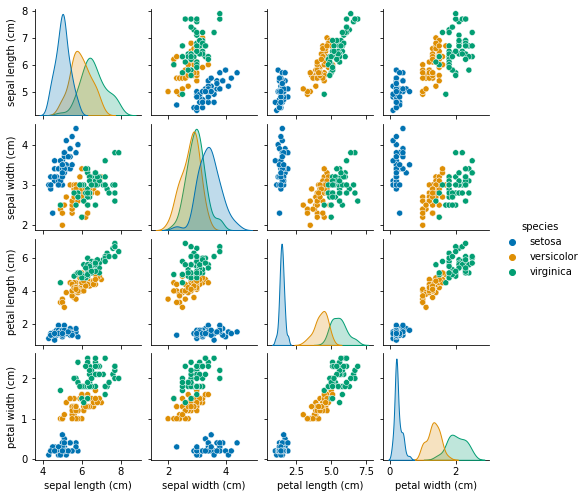

In [2]:
import seaborn as sns
sns.pairplot(data, hue="species", height = 1.75, palette = 'colorblind');

**Reducción de la dimensión:** $\;$ si la dimensión $D$ es elevada, existen técnicas para reducirla y visualizar los datos en 2d o 3d

**Ejemplo:** reducción de imagénes $8\times 8$ de dígitos manuscritos a 2d para examinar cómo se separa cada clase del resto

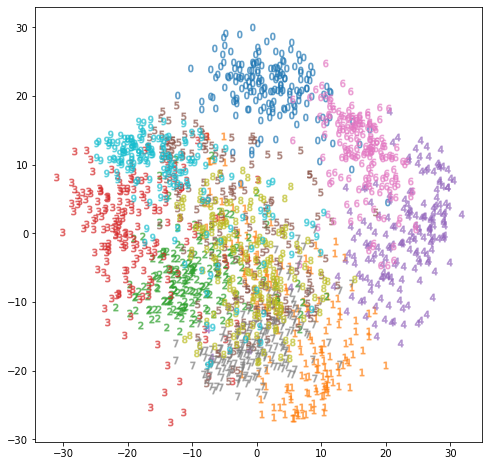

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X2d = PCA(n_components=2).fit_transform(digits.data)
plt.figure(figsize=(8, 8))
colors = cm.tab10(np.linspace(0, 1, 10))
for digit in digits.target_names:
    plt.scatter(*X2d[digits.target == digit].T, marker=f"${digit}$", s=50, alpha=0.5, color=colors[digit])

### 2.1.3 Aprendizaje de un clasificador

**Aprendizaje de un clasificador o regla de decisión $\,f(\boldsymbol{x};\boldsymbol{\theta})$:** $\;$ suele reducirse a escoger un valor para el $\boldsymbol{\theta}$ que lo gobierna

**Efecto de un clasificador:** $\;$ particiona el espacio de entrada en **regiones de decisión** separadas por **fronteras de decisión**

**Ejemplo:** regla decisión sencilla para distinguir setosa de no-setosa en iris usando la longitud de pétalo ($x$)
$$f(\boldsymbol{x};\boldsymbol{\theta})=\left\{\begin{array}{l}%
\text{setosa si $x\leq 2.45$}\\
\text{versicolor o virgínica si no}
\end{array}\right.$$
En esta regla tenemos parámetros $\boldsymbol{\theta}=(2.45)$, frontera $x=2.45$, y regiones $\mathcal{R}_{\text{setosa}}=\{x\leq 2.45\}$ y $\mathcal{R}_{\text{no-setosa}}=\{x>2.45\}$.

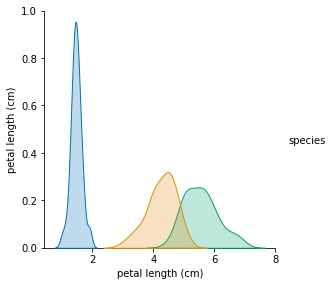

In [4]:
sns.pairplot(data, vars = data.columns[2:3], hue="species", height = 4, palette = 'colorblind');

**Ejemplo (cont.):** refinamiento de la regla anterior mediante particionamiento recursivo de regiones para construir un **árbol de decisión;** aquí solo añadimos una sub-regla para particionar la región no-setosa en versicolor y virgínica según la anchura de pétalo

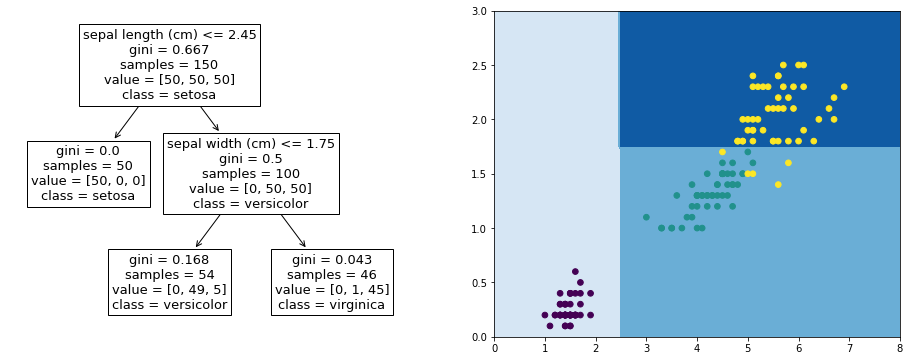

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = iris.data[:, [2, 3]]; y = iris.target
dt = DecisionTreeClassifier(max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, ax=axes[0], fontsize=13);
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=32);

### 2.1.4 Minimización del riesgo empírico

**Tasa de error (en entrenamiento):** $\;$ medida de rendimiento obvia para aprender el $\boldsymbol{\theta}$ de un clasificador
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_ {n=1}^N\mathbb{I}(y_n\neq f(\boldsymbol{x}_n;\boldsymbol{\theta}))
\quad\text{con}\quad%
\mathbb{I}(\text{cierto})=1,\;\mathbb{I}(\text{falso})=0$$

**Riesgo empírico:** $\;$ generaliza la tasa de error mediante la introducción de una **función de pérdida** $\ell(y,\hat{y})$ para medir la pérdida (coste) producida al clasificar una muestra de la clase $y$ en la clase $\hat{y}$
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_ {n=1}^N\ell(y_n, f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Pérdida 01:** $\;\ell_{01}(y,\hat{y})=\mathbb{I}(y\neq\hat{y})$, particulariza el riesgo empírico a la tasa de error

**Funciones de pérdida usuales:** $\;$ se usan pérdidas parecidas a la 01, aunque no la 01 exactamente, para facilitar el aprendizaje

**Errores de diferentes costes:** $\;$ otro motivo obvio para usar pérdidas distintas a la 01

**Ejemplo:** pérdida con costes distintos en iris; suponemos que setosa y versicolor son comestibles, pero virginica no, por lo que confundir una virgínica por una setosa o versicolor tiene mayor coste que cualquier otra confusión
\begin{align*}
\ell(y,\hat{y})   && \text{setosa} && \text{versicolor} && \text{virginica}\\\hline%
\text{setosa}     &&             0 &&                 1 &&       1\\%
\text{versicolor} &&             1 &&                 0 &&       1\\%
\text{virginica}  &&            10 &&                10 &&       0\\\hline%
\end{align*}

**Minimización del riesgo empírico:** $\;$ es la aproximación básica al **entrenamiento o ajuste del modelo**
$$\hat{\boldsymbol{\theta}}=\operatorname*{argmin}_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})=\operatorname*{argmin}_{\boldsymbol{\theta}} \frac{1}{N}\sum_{n=1}^N\ell(y_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Generalización óptima:** $\;$ en realidad el verdadero objetivo consiste en minimizar la pérdida esperada sobre datos futuros todavía no vistos, esto es, queremos que el modelo generalice lo mejor posible, no que simplemente funcione bien con los datos de entrenamiento

### 2.1.5 Incertidumbre

**Imposibilidad de aprender clasificadores libres de error:** $\;$ a causa de dos fuentes de incertidumbre
* **Incertidumbre epistémica o de modelo:** $\;$ falta de conocimiento sobre la transformación entrada-salida
* **Incertidumbre aleatórica o de datos:** $\;$ estocasticidad intrínseca e irreducible en la transformación; p.e. datos de clases distintas y mismo $\boldsymbol{x}$

**Predicción de una distribución de probabilidad sobre las clases en lugar de una sola clase:** $\;$ aproximación usual para capturar la incertidumbre
$$p(y=c\mid \boldsymbol{x}; \boldsymbol{\theta})=f_c(\boldsymbol{x}; \boldsymbol{\theta})%
\qquad\text{donde}\qquad%
f:\mathcal{X}\to[0, 1]^C, \quad 0\leq f_c\leq 1, \quad \sum_c f_c=1$$

**Softmax:** $\;$ función de ayuda típica para el aprendizaje de $f$ sujeto a las restricciones usuales de una función de probabilidad
$$\mathcal{S}:\mathbb{R}^C\to[0,1]^C\qquad\text{definida como}\qquad%
S(\boldsymbol{a})=\frac{1}{\sum_c e^{a_c}}(e^{a_1},\dotsc,e^{a_C})^t$$
* **Logits:** $\;\boldsymbol{a}$ pueden interpretarse como un vector de log-probabilidades no normalizadas
* **Logits normalizados:** $\;$ la softmax normaliza los logits para que cumplan las restricciones de probabilidad
* **Uso:** $\;f$ puede ser cualquier función de la entrada que nos convenga, no sujeta a las restricciones de probabilidad

**Regresión logística (multiclase):** $\;$ modelo probabilístico que usa la softmax con logits calculados como transformación afín de la entrada
$$f(\boldsymbol{x}; \mathbf{W}, \boldsymbol{b})=\mathbf{W}^t\boldsymbol{x}+\boldsymbol{b}%
\qquad\text{con}\qquad%
\mathbf{W}=(\boldsymbol{w}_1,\dotsc,\boldsymbol{w}_C)\in\mathbb{R}^{D\times C},\quad\boldsymbol{b}\in\mathbb{R}^C$$
* **Pesos o coeficientes de regresión:** $\;\boldsymbol{w}_c$ (para cada clase $c$)
* **Sesgo u ordenada en origen (intercept):** $\;b_c$ (para cada clase $c$)
* **Notación homogénea o compacta:** $\;$ por simplicidad, para que los sesgos queden absorbidos por la matriz de pesos
$$f(\tilde{\boldsymbol{x}}; \tilde{\mathbf{W}})=\tilde{\mathbf{W}}^t\tilde{\boldsymbol{x}}%
\qquad\text{con}\qquad%
\tilde{\mathbf{W}}=\begin{pmatrix}\boldsymbol{b}^t\\\mathbf{W}\end{pmatrix}\in\mathbb{R}^{(1+D)\times C}, %
\quad\tilde{\boldsymbol{x}}=(1, \boldsymbol{x})^t\in\mathbb{R}^{1+D}$$


### 2.1.6 Estimación por máxima verosimilitud

**Los-pérdida o neg-log-probabilidad:** $\;$ función de pérdida usual para el ajuste de modelos probabilísticos
$$\ell(y, f(\boldsymbol{x}; \boldsymbol{\theta}))=-\log p(y\mid f(\boldsymbol{x}; \boldsymbol{\theta}))$$
* Si el modelo asigna probabilidad uno a la clase correcta, la pérdida es nula;
* Si no, la pérdida será positiva y será tanto mayor cuanto menor sea la probabilidad asignada a la clase correcta

**Neg-log-verosimilitud (NLL):** $\;$ riesgo empírico con log-pérdida
$$\operatorname{NLL}(\boldsymbol{\theta})%
=-\frac{1}{N}\sum_n \log p(y_n\mid f(\boldsymbol{x}_n; \boldsymbol{\theta}))$$

**Estimador máximo-verosímil (MLE):** $\;$ vector de parámetros que minimiza la NLL
$$\hat{\boldsymbol{\theta}}_{\text{mle}}%
=\operatorname*{argmin}_{\boldsymbol{\theta}}\;\operatorname{NLL}(\boldsymbol{\theta})$$
* El MLE se utiliza muy frecuentemente para ajustar modelos a partir de datos de entrenamiento

**Ejemplo:** regresión logística aplicada a iris usando la longitud y anchura de pétalos

W= [[ 11.12767979   3.22717485 -14.35485463]
 [ -2.74866104   0.08356447   2.66509657]
 [ -1.16890756  -0.90803047   2.07693804]]


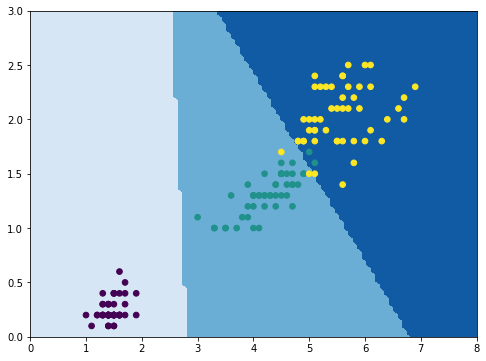

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = iris.data[:, [2, 3]]; y = iris.target
rl = LogisticRegression().fit(X, y)
print("W=", np.vstack((rl.intercept_, rl.coef_.T)))
fig = plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = rl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = plt.contourf(xx, yy, Z, 2, cmap='Blues'); plt.scatter(*X.T, c=y, s=32);

## 2.2 Regresión

**Problema de regresión:** $\;$ la salida es un real $y\in\mathbb{R}$ en lugar de una etiqueta de clase $y\in\{1,\dotsc,C\}$, como ocurre en clasificación

**Función de pérdida usual:** $\;$ la **pérdida cuadrática o L2**
$$\ell_2(y,\hat{y})=(y-\hat{y})^2$$

**Residuo:** $\;$ diferencia entre observación y predicción, $y-\hat{y}$

**Error cuadrático medio (MSE, mean squared error):** $\;$ riesgo empírico con pérdida cuadrática
$$\operatorname{MSE}(\boldsymbol{\theta})=\frac{1}{N}\sum_n (y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2$$

**Distribución normal o Gaussiana:** $\;$ modelo probabilístico que suele usarse para capturar la incertidumbre
$$p(y\mid \boldsymbol{x}; \boldsymbol{\theta})%
=\mathcal{N}(y\mid \mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[{-\frac{1}{2\sigma^2}(y-\mu)^2}\right]%
\qquad\text{con}\qquad%
\mu=f(\boldsymbol{x}; \boldsymbol{\theta})%
\quad\text{y}\quad%
\sigma^2\;\text{fija}$$

**NLL proporcional al MSE:** $\;$ por lo que el MLE de $\boldsymbol{\theta}$ también minimiza el MSE
$$\begin{align*}\operatorname{NLL}(\boldsymbol{\theta})%
&=-\frac{1}{N}\sum_n\log\left[\left(2\pi\sigma^2\right)^{-\frac{1}{2}}%
\exp\left(-\frac{1}{2\sigma^2}(y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2\right)\right]\\%
&=\frac{1}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}\frac{1}{N}\sum_n (y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2\\%
&=\operatorname{const}+\frac{1}{2\sigma^2}\operatorname{MSE}(\boldsymbol{\theta})
\end{align*}$$

**Regresión simple y múltiple:** $\;$ simple si la entrada es unidimensional, $x\in\mathbb{R}$; si no, múltiple

### 2.2.1 Regresión lineal

**Regresión lineal simple (1d):** $\;$ predice la salida esperada mediante una recta de parámetros $\,\boldsymbol{\theta}=(b ,w)$
$$f(x;\boldsymbol{\theta})=b+wx$$
* $w$ es la **pendiente** de la recta
* $b$ es el **desplazamiento u ordenada en origen**
* El ajuste de ambos parámetros mediante minimización del MSE conduce a una solución de **mínimos cuadrados**

**Ejemplo:** $\;$ regresión lineal simple con datos sintéticos
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

w =  [-4.35089704  0.53773872]


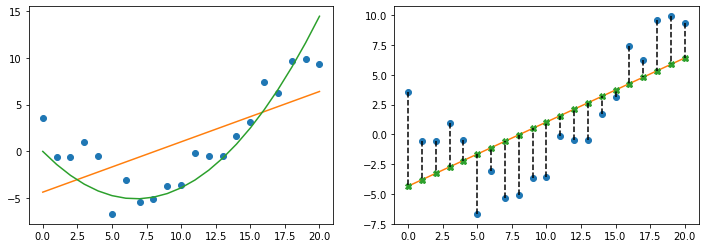

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X = np.linspace(0.0, 20, N)
y_mean = np.dot(w[0], X) + np.dot(w[1], np.square(X)) 
y = y_mean + np.random.normal(0, sigma, N)
X1 = np.c_[np.ones((N, 1)), X]
w = np.linalg.lstsq(X1, y, rcond=None)[0]; y_pred = X1 @ w
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes[0]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_mean, '-')
ax = axes[1]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_pred, 'X');
for x0, y0, y_hat in zip(X, y, y_pred):
    ax.plot([x0, x0], [y0, y_hat], 'k--')

**Regresión lineal múltiple (2d+):** predice la salida esperada mediante una combinación lineal de las entradas:
$$f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+\cdots+w_Dx_D=b+\boldsymbol{w}^t\boldsymbol{x}$$
* Como en regresión lineal 1d, el ajuste de parámetros mediante minimización del MSE conduce a una solución de **mínimos cuadrados**

**Ejemplo:** $\,$ predicción de temperatura en función de la localización 2d en una sala, $f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+w_2x_2$

In [2]:
import numpy as np
from scipy.io import loadmat
import requests
from io import BytesIO
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
data = loadmat(BytesIO(requests.get(url).content))
X, y = data["X"], data["y"]; N = X.shape[0]
print(np.hstack((X, y))[:3, :])

[[21.5    23.     17.8618]
 [24.5    20.     18.2146]
 [19.5    19.     18.0284]]


w =  [1.64141259e+01 1.37458660e-02 3.72170281e-03]


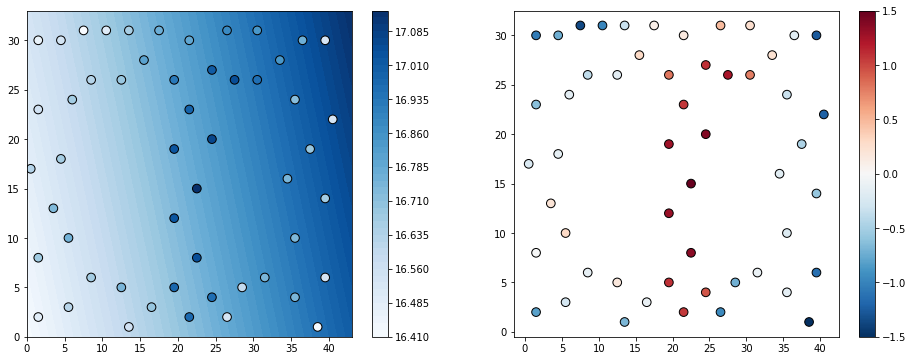

In [3]:
import matplotlib.pyplot as plt
X1 = np.c_[np.ones((N, 1)), X]
w = np.linalg.lstsq(X1, y, rcond=None)[0].squeeze()
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(16, 6))
xx, yy = np.meshgrid(np.linspace(0, 43, num=100), np.linspace(0, 33, num=100))
z = lambda x: w[0] + np.dot(w[1:], x)
zz = np.apply_along_axis(z, 1, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax = axes[0]; cp = ax.contourf(xx, yy, zz, 50, cmap='Blues'); plt.colorbar(cp, ax=ax)
ax.scatter(*X.T, c=y.reshape(1, -1), cmap='Blues', edgecolors='black', s=75); 
ax = axes[1]; res = y - np.apply_along_axis(z, 1, X).reshape(-1, 1) # residuos
sp = ax.scatter(*X.T, c=res, cmap='RdBu_r', edgecolors='black', s=75, vmin=-1.5, vmax=1.5)
plt.colorbar(sp, ax=ax);

### 2.2.2 Regresión polinómica

**Regresión polinómica simple de grado $G$:** $\,$ predice la salida esperada mediante una combinación lineal de las entradas previamente transformadas con una **función base polinómica de grado $G$**
$$f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{\phi}(x)%
\qquad\text{donde}\qquad%
\boldsymbol{\phi}(x)=(1,x,x^2,\dotsc,x^G)$$

**Extracción o ingeniería de características:** $\;$ rol de $\boldsymbol{\phi};\,$ técnicamente, se trata de un caso particular de regresión lineal múltiple

**Ejemplo (cont.):** $\;$ regresión polinómica simple con datos sintéticos
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

w =  [ 1.97649843 -1.46038617  0.09990624]


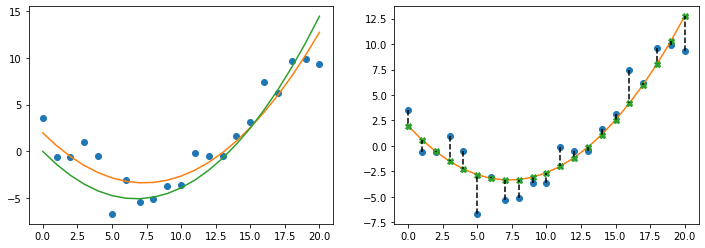

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X = np.linspace(0.0, 20, N)
y_mean = np.dot(w[0], X) + np.dot(w[1], np.square(X))
y = y_mean + np.random.normal(0, sigma, N)
X1 = np.c_[np.ones((N, 1)), X]
G = 2 # <<< escoge grado
for g in np.arange(2, G+1):
    X1 = np.hstack((X1, pow(X, g).reshape(-1, 1)))
w = np.linalg.lstsq(X1, y, rcond=None)[0]; y_pred = X1 @ w
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes[0]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_mean, '-')
ax = axes[1]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_pred, 'X');
for x0, y0, y_hat in zip(X, y, y_pred):
    ax.plot([x0, x0], [y0, y_hat], 'k--')

**Regresión polinómica múltiple de grado $G$:** $\;$ generaliza la simple mediante una función base polinómica de grado $G$ **múltiple**
$$f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{\phi}(\boldsymbol{x})%
\qquad\text{donde}\qquad%
\boldsymbol{\phi}(\boldsymbol{x})=(1,x_1,\dotsc,x_D,x_1^2,x_1x_2,\dotsc,x_D^2,x_1^3,\dotsc,x_D^G)$$
* Al igual que regresión polinómica simple de grado $G$, técnicamente se trata de un caso particular de regresión lineal múltiple

**Ejemplo (cont.):** $\;$ predicción de temperatura en función de la localización 2d en una sala
$$f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+w_2x_2+w_3x_1^2+w_4x_2^2$$

w =  [ 1.44583001e+01  1.97176089e-01  1.73554412e-01 -4.53576130e-03
 -5.19514810e-03]


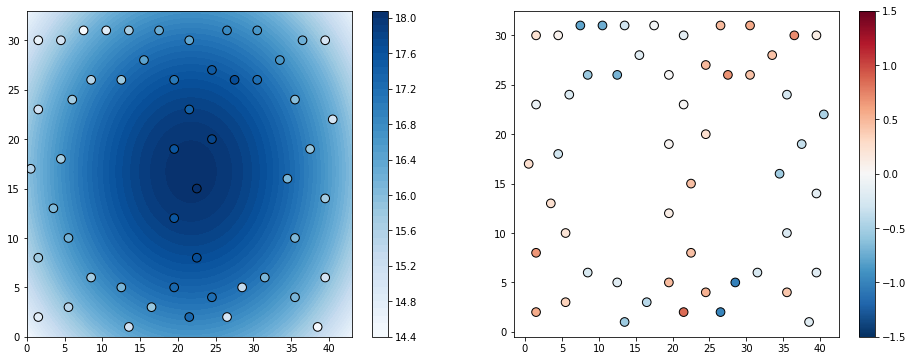

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import requests
from io import BytesIO
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
data = loadmat(BytesIO(requests.get(url).content))
X, y = data["X"], data["y"]; N = X.shape[0]
X1 = np.c_[np.ones((N, 1)), X, np.square(X)]
w = np.linalg.lstsq(X1, y, rcond=None)[0].squeeze()
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(16, 6))
xx, yy = np.meshgrid(np.linspace(0, 43, num=100), np.linspace(0, 33, num=100))
z = lambda x: w[0] + np.dot(w[1:], x)
Z = np.c_[xx.ravel(), yy.ravel()]; ZZ = np.c_[Z, np.square(Z)]
zz = np.apply_along_axis(z, 1, ZZ).reshape(xx.shape)
ax = axes[0]; cp = ax.contourf(xx, yy, zz, 50, cmap='Blues'); plt.colorbar(cp, ax=ax)
ax.scatter(*X.T, c=y.reshape(1, -1), cmap='Blues', edgecolors='black', s=75); 
ax = axes[1]; res = y - np.apply_along_axis(z, 1, X1[:, 1:]).reshape(-1, 1) # residuos
sp = ax.scatter(*X.T, c=res, cmap='RdBu_r', edgecolors='black', s=75, vmin=-1.5, vmax=1.5);
plt.colorbar(sp, ax=ax);

### 2.2.3 Redes neuronales profundas

**Redes neuronales profundas (DNNs, deep neural networks):** $\;$ introducen funciones base más generales, con parámetros propios
* **Descomposición recursiva de la extracción de características:** $\;$ con una pila de $L$ funciones o **capas** anidadas
$$f(\boldsymbol{x};\boldsymbol{\theta})=f_L(f_{L-1}(\cdots f_1(\boldsymbol{x})\cdots))$$
* **Parámetros de las capas:** $\;$ cada capa $\ell$ se define con un subconjunto de parámetros $\boldsymbol{\theta}_{\ell}\,$ (o sin parámetros, $\boldsymbol{\theta}_{\ell}=\emptyset$)
$$f_{\ell}(\boldsymbol{x})=f_{\ell}(\boldsymbol{x};\boldsymbol{\theta}_{\ell})$$
* **Capa final:** $\;$ definida a partir del extractor de características aprendido, $f_{1:L-1}(\boldsymbol{x})$
$$f_L(\boldsymbol{x})=\boldsymbol{w}^t\,f_{1:L-1}(\boldsymbol{x})$$

**Redes neuronales convolucionales (CNNs):** $\;$ DNNs adaptadas para imágenes

**Redes neuronales recurrentes (RNNs):** $\;$ DNNs adaptadas para secuencias

## 2.3 Sobre-entrenamiento y generalización

**Sobre-entrenamiento de un modelo:** $\;$ su riesgo con datos vistos (en entrenamiento) es mucho menor que con no vistos
* En general, todo modelo suficientemente flexible (complejo) tiende a sobre-entrenarse

**Riesgo empírico:** $\;$ esto es, con respecto a los datos de entrenamiento
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{train}})%
=\frac{1}{\lvert\mathcal{D}_{\text{train}}\rvert}%
\sum_ {(\boldsymbol{x},\boldsymbol{y})\in\mathcal{D}_{\text{train}}} %
\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))$$

**Riesgo teórico (poblacional):** $\;$ esto es, con respecto a la distribución conjunta **real y desconocida** de $\boldsymbol{x}$ e $\boldsymbol{y}$, $\,p^*(\boldsymbol{x},\boldsymbol{y})$
$$\mathcal{L}(\boldsymbol{\theta}; p^*)%
=\mathbb{E}_{p^*(\boldsymbol{x},\boldsymbol{y})}[\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))]$$

**Riesgo en test:** $\;$ aproximación del teórico con un **conjunto de test,** esto es, de datos no vistos (p.e. separados de $\mathcal{D}_{\text{train}}$)
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{test}})%
=\frac{1}{\lvert\mathcal{D}_{\text{train}}\rvert}%
\sum_ {(\boldsymbol{x},\boldsymbol{y})\in\mathcal{D}_{\text{test}}} %
\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))$$

**Gap de generalización:** $\;$ diferencia entre el riesgo en test y entrenamiento
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{test}})-\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{train}})$$

**Evaluación del sobreajuste de un modelo:** $\;$ suele hacerse en función del gap de generalización; si es alto, el modelo se halla sobreajustado (demasiado complejo)

**Modelos subajustados:** $\;$ si el gap es reducido, pero el riesgo (empírico y en test) es alto (en comparación con otros modelos), posiblemente nos hallamos ante un modelo subjustado (demasiado sencillo)

**Ejemplo (cont.):** $\;$ regresión polinómica simple con datos sintéticos; MSE en training y test en función del grado
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

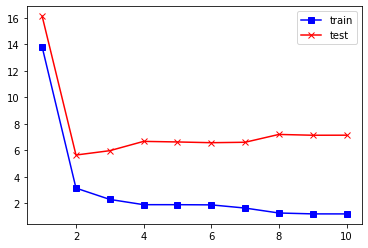

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X_train = np.linspace(0.0, 20, N)
M = 210 # datos de test sintetizados
X_test = np.linspace(0.0, 20, M)
X = np.concatenate((X_train, X_test))
y_mean = np.dot(w[0], X) + np.dot(w[1], np.square(X))
y = y_mean + np.random.normal(0, sigma, N + M)
X1 = np.ones((N + M, 1)); y_train = y[:N]; y_test = y[N:]
G = 10; gg = np.arange(1, G + 1); mse = np.zeros((G + 1, 2))
for g in gg:
    X1 = np.hstack((X1, pow(X, g).reshape(-1, 1)))
    X_train = X1[:N]; X_test = X1[N:]
    w = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
    mse[g, 0] = np.square(y_train - X_train @ w).sum() / N
    mse[g, 1] = np.square(y_test - X_test @ w).sum() / M
plt.plot(gg, mse[1:, 0], color='b', marker='s', label='train')
plt.plot(gg, mse[1:, 1], color='r', marker='x', label='test'); plt.legend();

**Riesgo en validación:** $\;$ en la práctica, la selección de un modelo adecuado no se hace con el test, sino con una fracción distinta del training que llamamos **conjunto de validación**

## 2.4 El teorema *no free lunch*

**Teorema *no free lunch* (nadie da un duro a cuatro pesetas):** $\;$ no existe un único mejor modelo para todo tipo de problemas
* Esto se debe a que un conjunto de asunciones que funciona bien en un dominio puede no funcionar bien en otro
* Conviene disponer de diversos modelos y técnicas asociadas con las que abordar cada problema nuevo que se presente

**Selección de modelos para un nuevo problema:** $\;$ deberá basarse en conocimiento del dominio, así como en técnicas de estimación del riesgo teórico como **validación cruzada** o **selección de modelos Bayesiana**